In [1]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 103.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zXYMFTVdrbIq01s81rNO")
project = rf.workspace("andi-lin-exrta").project("proyecto-repaso-3-objetos-7rkl4")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Proyecto-Repaso-3-Objetos-2 in yolov11:: 100%|██████████| 50/50 [00:00<00:00, 4405.97it/s]


In [3]:
from ultralytics import YOLO
model = YOLO("yolo11s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
data_path = "/content/Proyecto-Repaso-3-Objetos-2/data.yaml"
results = model.train(data=data_path,
                      epochs=15,
                      imgsz=640)

Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Proyecto-Repaso-3-Objetos-2/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

In [5]:
# Cargamos el modelo ya entrenado
custom_model = YOLO('/content/runs/detect/train/weights/best.pt')

In [12]:
# Realizamos predicciones sobre algunas imágenes
res = custom_model("/content/Proyecto-Repaso-3-Objetos-2/train/images")


image 1/13 /content/Proyecto-Repaso-3-Objetos-2/train/images/1000042823_jpg.rf.5343a778777034357e4785b3054a717f.jpg: 640x640 (no detections), 470.5ms
image 2/13 /content/Proyecto-Repaso-3-Objetos-2/train/images/1000042824_jpg.rf.1d23bd1bcdcba8e77769325582ea260e.jpg: 640x640 1 Mouse, 473.4ms
image 3/13 /content/Proyecto-Repaso-3-Objetos-2/train/images/1000042826_jpg.rf.82d00da0dd0e7ae86746dd65c1bb8463.jpg: 640x640 1 Mouse, 525.2ms
image 4/13 /content/Proyecto-Repaso-3-Objetos-2/train/images/1000042828_jpg.rf.81c0ffa891b5d28792af1359932644d0.jpg: 640x640 1 Mouse, 483.1ms
image 5/13 /content/Proyecto-Repaso-3-Objetos-2/train/images/1000042829_jpg.rf.91c772aa7b7ea4e430433235502be9db.jpg: 640x640 1 Mouse, 485.2ms
image 6/13 /content/Proyecto-Repaso-3-Objetos-2/train/images/1000042830_jpg.rf.30ee657f3c49f940f2a86ffd7a4beced.jpg: 640x640 1 Caja Lapiz, 472.3ms
image 7/13 /content/Proyecto-Repaso-3-Objetos-2/train/images/1000042834_jpg.rf.c3c2f95c93cf0aab5feb122bdfe5c09a.jpg: 640x640 1 Celular

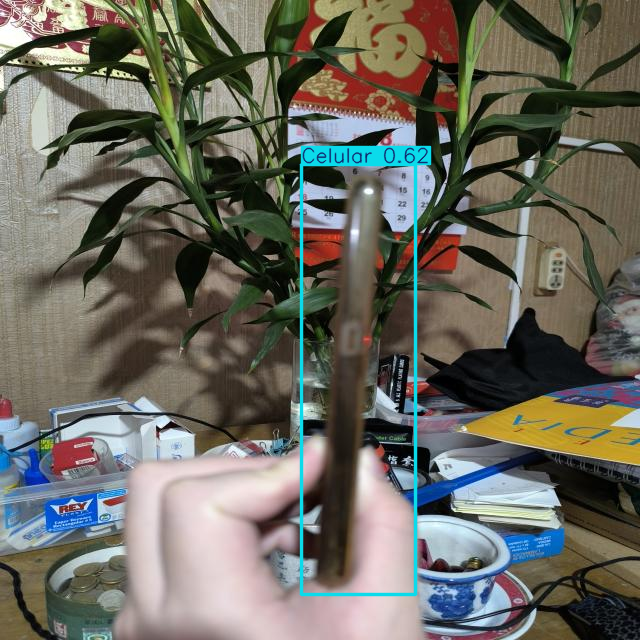

In [20]:
# Visualizamos los resultados de las detecciones
res[9].show()